# TLE-HC

**Overview**

Case-control difference mapping in temporal lobe epilepsy. This notebook will examine morphological features of the hippocampus in TLE patients. We compare the ipsilateral foci hippocampi to contralateral (asymmetry analysis), and to age-matched controls (case-control analysis).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import hippomaps as hm
import pandas as pd

/export03/data/opt/venv/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
hippunfold_dir = '../../../publication-hippomaps/hippunfold/MICs_v1.3.0/hippunfold'

hemis = ['L','R']
labels = ['hipp']#,'dentate'] 
den = '0p5mm'

# get expected number of vertices and their indices
nV,iV = hm.config.get_nVertices(labels,den) 

# loop through these types of structural images
features = ['thickness','gyrification','curvature','surfarea']

In [3]:
PX = pd.read_csv(f'../../../publication-hippomaps/hippunfold/participants_MICs_PX.csv', delimiter=',')
PX

,ID,SES,AGE,SEX,SITE,group,pathology,T1W,QT1,FLAIR,DWI
0,sub-PX003,ses-01,54,M,1,Patient,Left TLE,1,1,0,1
1,sub-PX005,ses-01,26,F,1,Patient,Left TLE,1,1,0,1
2,sub-PX012,ses-03,36,F,1,Patient,Left TLE,1,1,1,1
3,sub-PX013,ses-01,57,M,1,Patient,Left TLE,1,1,0,1
4,sub-PX016,ses-01,41,F,1,Patient,Right TLE,1,1,0,1
5,sub-PX019,ses-01,31,M,1,Patient,Left TLE,1,1,0,1
6,sub-PX020,ses-02,54,M,1,Patient,Left TLE,1,1,1,1
7,sub-PX021,ses-01,55,F,1,Patient,Left TLE,1,1,0,1
8,sub-PX024,ses-01,26,F,1,Patient,Left TLE,1,0,0,1
9,sub-PX025,ses-02,27,M,1,Patient,Right TLE,1,1,1,1


In [4]:
print(f"mean age: {np.mean(PX['AGE'])} +/- {np.std(PX['AGE'])}")
print(f"M/F: {np.sum(PX['SEX']=='M')}/{np.sum(PX['SEX']=='F')}")
print(f"L/R: {np.sum(PX['pathology']=='Right TLE')}/{np.sum(PX['pathology']=='Left TLE')}")

mean age: 38.8 +/- 11.63688716354777
M/F: 17/18
L/R: 15/20


In [5]:
PX['pathology'][0]

'Left TLE'

In [6]:
# Load data
hipp_dat = np.zeros([nV,len(hemis),len(PX['ID']),len(features)])*np.nan 

# Preprocess
# Profile align the depths of each column (as in https://github.com/jordandekraker/hippomaps/blob/master/tutorials/Histology-MRI-9p4T.ipynb)
for f,feature in enumerate(features):
    for s,sub in enumerate(PX['ID']):
        for h,hemi in enumerate(hemis):  
            for l,label in enumerate(labels):
                ses = PX['SES'][s]
                if PX['pathology'][s][0] == hemi:
                    ic = 0 # always put ipsi first
                else:
                    ic=1 # contra second
                fn = f'{hippunfold_dir}/{sub}/{ses}/surf/{sub}_{ses}_hemi-{hemi}_space-T1w_den-{den}_label-{label}_{feature}.shape.gii'
                if feature=='curvature' and hemi == 'R':
                    hipp_dat[iV[l],ic,s,f] = -nib.load(fn).darrays[0].data
                else:
                    hipp_dat[iV[l],ic,s,f] = nib.load(fn).darrays[0].data

In [7]:
HC = pd.read_csv(f'../../../publication-hippomaps/hippunfold/participants_MICs_HC.csv', delimiter=',')
HC

,ID,SES,AGE,SEX,SITE,group,pathology,T1W,QT1,FLAIR,DWI
0,sub-HC005,ses-02,27.0,M,MICs,Control,NaN,1,1,1,1
1,sub-HC009,ses-02,34.0,F,MICs,Control,NaN,1,1,1,1
2,sub-HC010,ses-03,40.0,M,MICs,Control,NaN,1,1,1,1
3,sub-HC012,ses-03,30.0,F,MICs,Control,NaN,1,1,1,1
4,sub-HC016,ses-02,33.0,M,MICs,Control,NaN,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
76,sub-HC039,ses-01,40.0,F,MICs,Control,NaN,1,1,1,0
77,sub-HC049,ses-01,41.0,M,MICs,Control,NaN,1,1,1,0
78,sub-HC053,ses-01,58.0,M,MICs,Control,NaN,1,1,1,0
79,sub-HC057,ses-01,37.0,M,MICs,Control,NaN,1,1,1,0


In [8]:
print(f"mean age: {np.mean(HC['AGE'])} +/- {np.std(HC['AGE'])}")
print(f"M/F: {np.sum(HC['SEX']=='M')}/{np.sum(HC['SEX']=='F')}")

mean age: 32.9375 +/- 12.031566554277127
M/F: 42/39


In [9]:
# Load data
hipp_dat_HC = np.zeros([nV,len(hemis),len(HC['ID']),len(features)])*np.nan 
# Preprocess
# Profile align the depths of each column (as in https://github.com/jordandekraker/hippomaps/blob/master/tutorials/Histology-MRI-9p4T.ipynb)
for f,feature in enumerate(features):
    for s,sub in enumerate(HC['ID']):
        for h,hemi in enumerate(hemis):  
            for l,label in enumerate(labels):
                ses = HC['SES'][s]
                fn = f'{hippunfold_dir}/{sub}/{ses}/surf/{sub}_{ses}_hemi-{hemi}_space-T1w_den-{den}_label-{label}_{feature}.shape.gii'
                if feature=='curvature' and hemi == 'R':
                    hipp_dat_HC[iV[l],h,s,f] = -nib.load(fn).darrays[0].data
                else:
                    hipp_dat_HC[iV[l],h,s,f] = nib.load(fn).darrays[0].data

## 1) plot group-averages

Here we plot averages of the ipsilateral seizure focus, contralalteral, and healthy controls. We then compare ipsilateral to contralalteral (an asymmetry analysis) and ipsilateral to controls (case-control differences). Asymmetry is nice since it includes perfect matching on things like demographics, etc., but in cases with severe epilepsy there can also be abnormalities or secondary epileptogenic zones in the contralateral hemisphere as well. Case-control differences are less closely matched, but we can be confident that the HC data is normative. 

In [10]:
# Here we calculate and add a new feature: columnar volume. This is simply thicknes (mm) * surface area (mm2) giving a units in mm3.

coolumnar_volume = hipp_dat[:,:,:,0]*hipp_dat[:,:,:,3]
hipp_dat = np.concatenate((hipp_dat,coolumnar_volume.reshape([nV,len(hemis),len(PX['ID']),1])),axis=3)

coolumnar_volume = hipp_dat_HC[:,:,:,0]*hipp_dat_HC[:,:,:,3]
hipp_dat_HC = np.concatenate((hipp_dat_HC,coolumnar_volume.reshape([nV,len(hemis),len(HC['ID']),1])),axis=3)

features.append('columnarVol')

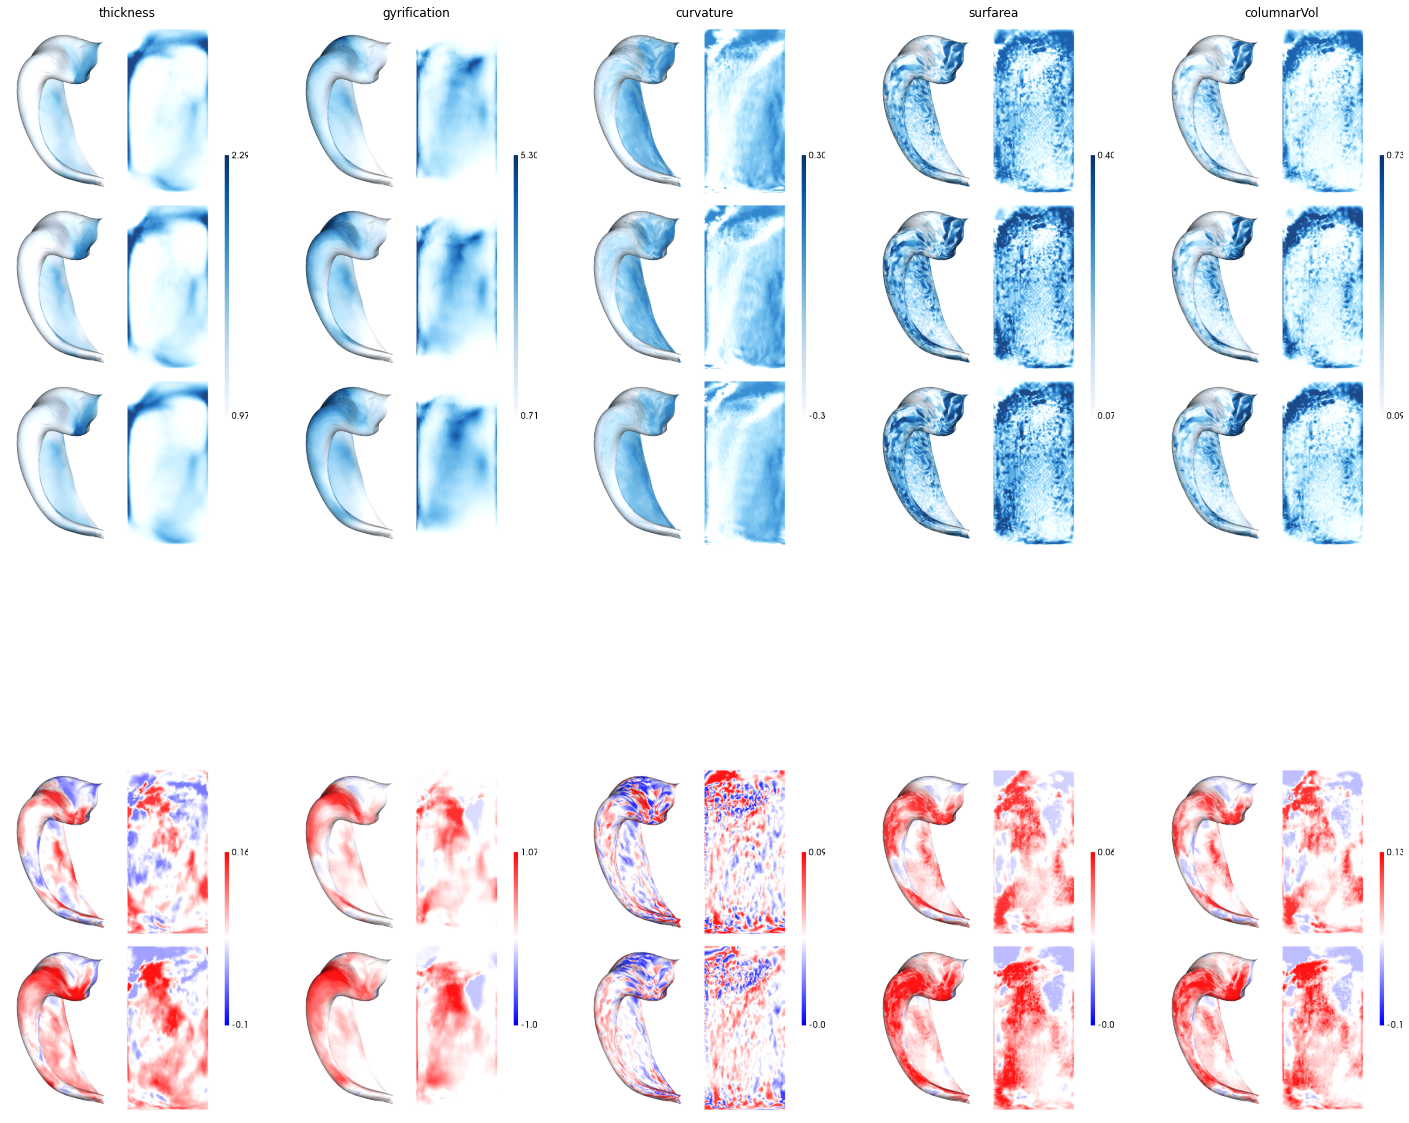

In [11]:
ipsilateral = np.mean(hipp_dat[:,0,:,:], axis=1)
contralateral = np.mean(hipp_dat[:,1,:,:], axis=1)
ctrl = np.mean(hipp_dat_HC,axis=(1,2))
asymmetry = contralateral-ipsilateral
caseCtrl = ctrl-ipsilateral

cdata1 = np.stack((ipsilateral,contralateral,ctrl),axis=2) # these will share color range
cdata2 = np.stack((asymmetry,caseCtrl),axis=2) # these will share their own separate color range

# plot altogether
fig, ax = plt.subplots(2,5, figsize=(25,25))
for f in range(5):
    hm.plotting.surfplot_canonical_foldunfold(cdata1[:,f,:], color_bar=('right'), hemis=['L'], labels=['hipp'], cmap='Blues', color_range='sym', unfoldAPrescale=True, share='both', tighten_cwindow=True, embed_nb=True, screenshot=True, filename='tmp.png')
    i = plt.imread('tmp.png')
    ax[0,f].imshow(i)
    ax[0,f].set_axis_off()
    ax[0,f].set_anchor("NW")
    ax[0,f].set_title(features[f])
    hm.plotting.surfplot_canonical_foldunfold(cdata2[:,f,:], color_bar=('right'), hemis=['L'], labels=['hipp'], cmap='bwr', color_range='sym', unfoldAPrescale=True, share='both', tighten_cwindow=True, embed_nb=True, screenshot=True, filename='tmp.png')
    i = plt.imread('tmp.png')
    ax[1,f].imshow(i)
    ax[1,f].set_axis_off()
    ax[1,f].set_anchor("NW")
    
!rm tmp.png

## 2) Examine inter-patient (ipsilateral) consistency

Here, we focus only on case-control differences for each ipsilateral hippocampus to the control average.

TtestResult(statistic=4.876997145961731, pvalue=2.278470962511645e-06, df=189)
TtestResult(statistic=6.4575080753712335, pvalue=8.76151025412419e-10, df=189)
TtestResult(statistic=15.186544536003135, pvalue=1.431884784956529e-34, df=189)
TtestResult(statistic=6.88452310563634, pvalue=8.317160023756746e-11, df=189)
TtestResult(statistic=6.688206318715512, pvalue=2.4820341157259765e-10, df=189)


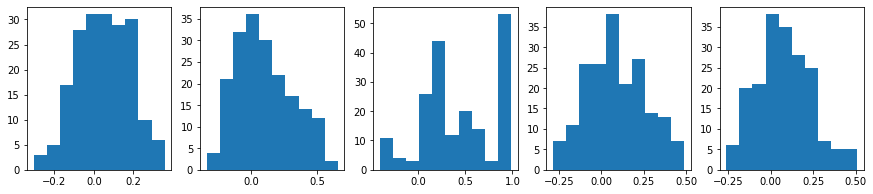

In [12]:
from scipy.stats import ttest_1samp

# make a histogram of the off-diagonal cross-patient correlations
mfcorr = []
sdfcorr = []
fig, ax = plt.subplots(nrows=1, ncols=len(features), figsize=(3*len(features),3))
for f,feature in enumerate(features):
    cdat = (ctrl[:,f]-hipp_dat[:,0,:,f].T).T
    corr = np.corrcoef(cdat.T) # as above 2
    fcorr = corr[np.triu_indices(20,k=1)] # this return only the off-diagonal (lower left triangle)
    print(ttest_1samp(fcorr,0,nan_policy='omit'))
    ax[f].hist(fcorr) # make a histogram for this particular feature
    mfcorr.append(np.mean(fcorr))
    sdfcorr.append(np.std(fcorr))

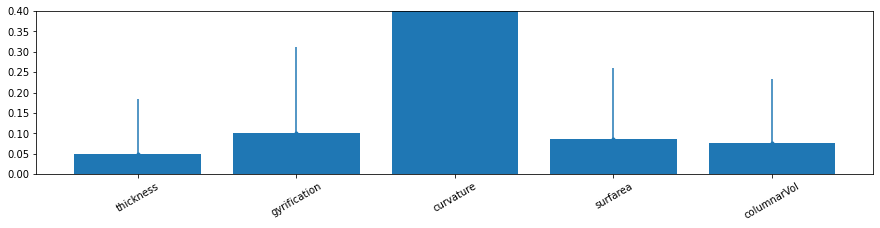

In [13]:
# instead of histograms, we will show a bar plot of the average and standard deviation
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3*len(features),3))
plt.bar(range(len(features)),mfcorr)
plt.errorbar(range(len(features)),mfcorr, yerr=sdfcorr, fmt=".")
plt.xticks(ticks=range(len(features)),labels=features,rotation=30)
plt.ylim([0,.4]);

## 3) Contextualize with other maps

Computing eigenmodes on surface using N=200 modes
TriaMesh with regular Laplace-Beltrami
Solver: spsolve (LU decomposition) ...
IMPORTANT: EIGENMODES MUST BE TRUNCATED AT FIRST NON-ZERO MODE FOR THIS FUNCTION TO WORK
Computing eigenmodes on surface using N=200 modes
TriaMesh with regular Laplace-Beltrami
Solver: spsolve (LU decomposition) ...
IMPORTANT: EIGENMODES MUST BE TRUNCATED AT FIRST NON-ZERO MODE FOR THIS FUNCTION TO WORK
Computing eigenmodes on surface using N=200 modes
TriaMesh with regular Laplace-Beltrami
Solver: spsolve (LU decomposition) ...
IMPORTANT: EIGENMODES MUST BE TRUNCATED AT FIRST NON-ZERO MODE FOR THIS FUNCTION TO WORK
Computing eigenmodes on surface using N=200 modes
TriaMesh with regular Laplace-Beltrami
Solver: spsolve (LU decomposition) ...
IMPORTANT: EIGENMODES MUST BE TRUNCATED AT FIRST NON-ZERO MODE FOR THIS FUNCTION TO WORK
Computing eigenmodes on surface using N=200 modes
TriaMesh with regular Laplace-Beltrami
Solver: spsolve (LU decomposition) ...
IMPO

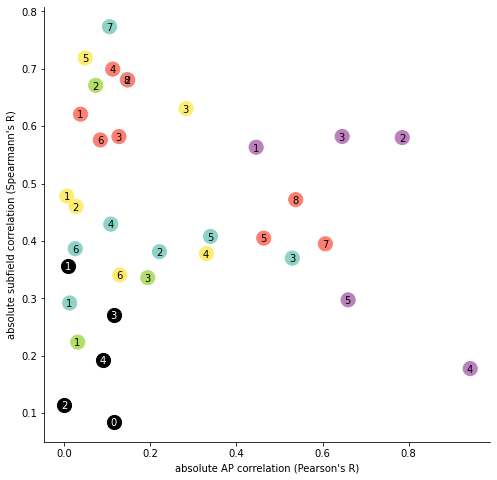

In [15]:
t, ax = hm.stats.contextualize2D(asymmetry, nperm=1000) # ideally nperm should be 10000

APcorr

Computing eigenmodes on surface using N=200 modes
TriaMesh with regular Laplace-Beltrami
Solver: spsolve (LU decomposition) ...
IMPORTANT: EIGENMODES MUST BE TRUNCATED AT FIRST NON-ZERO MODE FOR THIS FUNCTION TO WORK
Computing eigenmodes on surface using N=200 modes
TriaMesh with regular Laplace-Beltrami
Solver: spsolve (LU decomposition) ...
IMPORTANT: EIGENMODES MUST BE TRUNCATED AT FIRST NON-ZERO MODE FOR THIS FUNCTION TO WORK
Computing eigenmodes on surface using N=200 modes
TriaMesh with regular Laplace-Beltrami
Solver: spsolve (LU decomposition) ...
IMPORTANT: EIGENMODES MUST BE TRUNCATED AT FIRST NON-ZERO MODE FOR THIS FUNCTION TO WORK
Computing eigenmodes on surface using N=200 modes
TriaMesh with regular Laplace-Beltrami
Solver: spsolve (LU decomposition) ...
IMPORTANT: EIGENMODES MUST BE TRUNCATED AT FIRST NON-ZERO MODE FOR THIS FUNCTION TO WORK
Computing eigenmodes on surface using N=200 modes
TriaMesh with regular Laplace-Beltrami
Solver: spsolve (LU decomposition) ...
IMPO

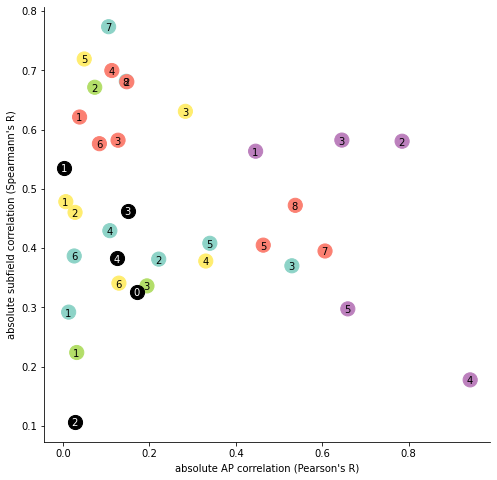

In [16]:
t, ax = hm.stats.contextualize2D(caseCtrl, nperm=1000) # ideally nperm should be 10000

**save**

In [ ]:
# save a copy of the 2D map
for f,feature in enumerate(features):
    for h,hemi in enumerate(hemis):
        for l,label in enumerate(labels):    
            cdat = caseCtrl[:,f]
            data_array = nib.gifti.GiftiDataArray(data=cdat)
            image = nib.gifti.GiftiImage()
            image.add_gifti_data_array(data_array)
            nib.save(image, f'../../../publication-hippomaps/maps/HippoMaps-initializationMaps/Dataset-MICs/MRI-3T-MRI-TLE-case-control-{feature}_average-{len(PX)}_hemi-mix_den-2mm_label-{label}.shape.gii')